# 동물보호관리시스템 유기동물 조회 서비스

<https://www.data.go.kr/dataset/15001096/openapi.do>

환경변수 여러 개를 한꺼번에 설정합니다.

반드시 Key, Token 등의 내용을 바꿔서 입력해 주세요.

```bash
# 1. 공공데이터포털
# Mac, Linux 또는 Windows Git Bash 등에선 다음과 같이 export를 사용하시면 됩니다.
export ANIMAL_API_KEY=abcdefghijklm%2FvSfZeu4FoGpl2eGP%2FzlR5eGh%2F9M8jbOv4HPFZI%2BM7ckZstS8OzkMKHNBkpAtdZX6T8VoRl4Q%3D%3D
# Windows 기본 환경에선 다음과 같이 set을 사용하세요.
set ANIMAL_API_KEY=abcdefghijklm%2FvSfZeu4FoGpl2eGP%2FzlR5eGh%2F9M8jbOv4HPFZI%2BM7ckZstS8OzkMKHNBkpAtdZX6T8VoRl4Q%3D%3D

# 2. LocationIQ
# Mac, Linux 또는 Windows Git Bash 등에선 다음과 같이 export를 사용하시면 됩니다.
export LOCATIONIQ_TOKEN=b023f593f83638
# Windows 기본 환경에선 다음과 같이 set을 사용하세요.
set LOCATIONIQ_TOKEN=b023f593f83638

# Jupyter Notebook 실행
jupyter notebook
```

환경 변수에서 API 키를 가져옵니다.

In [3]:
# 환경 변수에서 API 키 가져오기

import os
from urllib.parse import unquote

API_KEY = unquote(os.environ['ANIMAL_API_KEY']) # unquote : 공공데이터 포털에서 얻은 key는 다 붙여준다..
LOCATIONIQ_TOKEN = os.environ['LOCATIONIQ_TOKEN']

## 라이브러리 사용

In [4]:
# requests 사용

import requests

requests.__version__

'2.22.0'

In [5]:
# Pandas 사용

import pandas as pd

pd.__version__

'0.25.0'

In [6]:
# Matplotlib 사용

import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.1.0'

In [7]:
# matplotlib에 “AppleGothc”(Mac) 또는 “Malgun Gothic”(Windows) 글꼴 적용

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['Malgun Gothic']

In [8]:
# folium 패키지 설치

!pip install folium

In [9]:
# folium 버전 확인

import folium

folium.__version__

'0.10.0'

In [10]:
# folium 라이브러리의 Map과 HeatMap 사용

from folium import Map
from folium.plugins import HeatMap

## 동물보호관리시스템 유기동물 조회 서비스 API 사용

많은 데이터를 다루기 위해 한꺼번에 만 개를 얻어오겠습니다.

In [11]:
# 동물보호관리시스템 유기동물 조회 서비스 API

# 원래 URL: http://openapi.animal.go.kr/.../abandonmentPublic?serviceKey=어쩌고&bgnde=20190901&...
# http://openapi.animal.go.kr/openapi/service/rest/abandonmentPublicSrvc/abandonmentPublic?
#serviceKey=291j0v0eM6HdEl5UEm6N65YSiS8IKi1ytHyxWnu%2B4mh5KOr2AAQd38ZC9w1HUyf3pc0E7WcdxmhHpGiKApenFQ%3D%3D&
# bgnde=20140601&endde=20140630&upkind=417000&state=notice&pageNo=1&numOfRows=100&neuter_yn=Y

# 이렇게 긴 URL을 물음표(?)를 기준으로 두 부분으로 나눕니다.

# 물음표(?) 앞부분
url = 'http://openapi.animal.go.kr/openapi/service/rest/abandonmentPublicSrvc/abandonmentPublic'

# 물음표(?) 뒷부분
payload = {
    'serviceKey': API_KEY,
    'bgnde': '20190901',
    'endde': '20190930',
    'numOfRows': 10_000,
}

# API 호출
response = requests.get(url, params=payload)

print(response)

<Response [200]>


In [12]:
# Response의 Text 길이 확인

len(response.text)

7379559

표현에 주목해 보세요.
`reponse`는 응답이고, `response.text`는 응답 받은 내용입니다.
우리가 파싱해야 하는 대상은 `response.text`겠죠?

파싱을 하면 우리가 다루기 좋은 트리가 만들어집니다.

<https://en.wikipedia.org/wiki/Tree_(data_structure)>

컴퓨터의 폴더 구조가 전형적인 트리죠.

트리의 가장 중요한 특징은 우리가 뿌리를 통해 나무 전체를 다룰 수 있다는 겁니다.
예를 들어, Windows의 경우 `C:\`(C 드라이브 루트)에서 출발하면 모든 파일에 접근할 수 있죠.

In [15]:
# XML 데이터 파싱
# element tree 의 파싱방법, .NET에서는 사용이 불가한 방법이 있을 것이다..

import xml.etree.ElementTree as ET

root = ET.fromstring(response.text)

root

<Element 'response' at 0x000001B20805A688>

XML에 있던 `<item>` 항목을 모두 얻어보겠습니다.

ElementTree는 파이썬의 Iterator를 활용해서 이 기능을 제공합니다.

<https://wiki.python.org/moin/Iterator>

Iterator는 글을 읽는 어린아이의 손가락 같은 역할을 합니다.
지금 가르킨 글자를 읽고 다음 글자로 넘어가죠.

In [16]:
# 첫번째 내용을 얻고 다음으로 넘어갑니다.
# root iter 안의'item' : xml 파일 안에 있는 태그 이름


item = next(root.iter('item'))

# Item에 어떤 내용이 있는지 확인합니다.

list(item) # list안에 감싸주지 않으면 그냥 'item' 을 가진거 하나만 뜬다...

[<Element 'age' at 0x000001B208072368>,
 <Element 'careAddr' at 0x000001B208072408>,
 <Element 'careNm' at 0x000001B208072548>,
 <Element 'careTel' at 0x000001B2080725E8>,
 <Element 'chargeNm' at 0x000001B208072688>,
 <Element 'colorCd' at 0x000001B208072728>,
 <Element 'desertionNo' at 0x000001B2080727C8>,
 <Element 'filename' at 0x000001B208072868>,
 <Element 'happenDt' at 0x000001B208072908>,
 <Element 'happenPlace' at 0x000001B2080729A8>,
 <Element 'kindCd' at 0x000001B208072A48>,
 <Element 'neuterYn' at 0x000001B208072B88>,
 <Element 'noticeEdt' at 0x000001B208072C28>,
 <Element 'noticeNo' at 0x000001B208072CC8>,
 <Element 'noticeSdt' at 0x000001B208072D68>,
 <Element 'officetel' at 0x000001B208072E08>,
 <Element 'orgNm' at 0x000001B208072EA8>,
 <Element 'popfile' at 0x000001B208072F48>,
 <Element 'processState' at 0x000001B208074048>,
 <Element 'sexCd' at 0x000001B208074188>,
 <Element 'specialMark' at 0x000001B208074228>,
 <Element 'weight' at 0x000001B2080742C8>]

In [17]:
# <kindCd> 항목을 확인해 봅니다.
# 트리에서 바로 아래에 있는 걸 “자녀”라고 부릅니다.

child = item.find('kindCd')

print(child)

<Element 'kindCd' at 0x000001B208072A48>


In [18]:
# 자녀의 내용(text)을 확인해 봅니다.

print(child.text)

[개] 푸들


In [19]:
# 이게 뭐였죠?

print(child.tag)

kindCd


XML은 key와 value를 다루는데 유용합니다.
파이썬의 Dictionary와 같죠.

데이터:

```text
이름: 홍길동
나이: 13세
```

파이썬:

```python
{
    'name': '홍길동',
    'age:' 13
}
```

XML:

```xml
<person>
    <name>홍길동</name>
    <age>13</age>
</person>
```

`person`, `name`, `age` 등이 태그(tag)에 해당합니다.

In [20]:
# item의 모든 자녀 확인

for child in item:
    print(child.tag, child.text)

age 2016(년생)
careAddr 경상남도 고성군 고성읍 송학리 260-54
careNm 백호종합동물병원
careTel 010-3551-8261
chargeNm 이주영
colorCd 흰색
desertionNo 448542201900419
filename http://www.animal.go.kr/files/shelter/2019/09/201909241409108_s.jpg
happenDt 20190924
happenPlace 경남 고성군 영오면 양산4길 12
kindCd [개] 푸들
neuterYn N
noticeEdt 20191008
noticeNo 경남-고성-2019-00332
noticeSdt 20190924
officetel 055-670-4314
orgNm 경상남도 고성군
popfile http://www.animal.go.kr/files/shelter/2019/09/201909241409108.jpg
processState 보호중
sexCd M
specialMark 피모 불량
weight 5(Kg)


태그만 모아서 컬럼으로 활용합시다.

In [22]:
# 컬럼 목록 얻기

item = next(root.iter('item'))

columns = []

for child in item:
    columns.append(child.tag)

columns

['age',
 'careAddr',
 'careNm',
 'careTel',
 'chargeNm',
 'colorCd',
 'desertionNo',
 'filename',
 'happenDt',
 'happenPlace',
 'kindCd',
 'neuterYn',
 'noticeEdt',
 'noticeNo',
 'noticeSdt',
 'officetel',
 'orgNm',
 'popfile',
 'processState',
 'sexCd',
 'specialMark',
 'weight']

항상 최종 형태를 먼저 생각합니다.
테스트 코드로 쓰는 게 가장 좋고, 여의치 않다면 그에 준하는 모양을 간단히 잡아봅니다.

Pandas로 다루는 2차원 데이터는 Column과 Row의 조화를 통해 구성되죠.

Column은 이름이 있고, key-value 형태(`dictionary`)를 쓰면 매우 좋습니다.

Row는 그냥 `list`로 충분하죠.

즉, 데이터는 `dictionary`의 `list`가 됩니다.

```python
# item이 없을 때
rows = []

# item이 하나일 때
rows = [
    { 'age': '어쩌고', 'kindCd': '저쩌고', 'weight': '이런 식으로...' }
]

# item이 여럿일 때
rows = [
    { 'age': '어쩌고', 'kindCd': '저쩌고', 'weight': '이런 식으로...' },
    { 'age': '어쩌고', 'kindCd': '저쩌고', 'weight': '이런 식으로...' },
    { 'age': '어쩌고', 'kindCd': '저쩌고', 'weight': '이런 식으로...' }
]
```

사실 2차원 데이터는 항상 이 모양이라고 보셔도 무방합니다.

In [25]:
# XML 데이터를 Pandas DataFrame으로 변환

# dictionary의 list를 준비합니다. 처음엔 0개죠.
rows = []

# item을 하나씩 rows에 넣을 겁니다.
for item in root.iter('item'):
    # 해당 트리에서 (여기서는 루트로 전체 트리를 의미) item 태그를 모두 iter로 하나씩 확인
    
    # 일단 row를 준비합니다. 단수형과 복수형을 구분해서 쓰니까 주의하세요.
    row = {}
    # item의 자녀를 하나씩 row에 넣을 겁니다.
    # 이런 코드가 나오면 앞에 나온 for는 잊어버리세요.
    # 지금부터 나오는 것에 집중하세요.
    for child in list(item):
        # list 함수가 여기서는 item의 child node 들을 불러옴. 변경 전 함수 : item.getchildern()
        
        # dictionary는 key와 value를 함께 써서 추가 또는 변경합니다.
        # tag와 text가 헷갈리면 바로 위에 나온 ElementTree를 다시 확인하세요.
        # tag와 text는 보편적인 표현이 아닙니다.
        # A라는 폴더의 README.md 파일과 B라는 폴더의 README.md 파일은 이름이 같지만 전혀 다릅니다.
        # 어떤 게 들어있는지는 직접 열어보기 전에는 알 수 없습니다.
        # “모르는 것 발견 = 지금 당장 확인”을 습관으로 만드세요. 손은 눈보다 빠릅니다.
        row[child.tag] = child.text
        #print(row)
    # 이렇게 블록이 끝나면 방금 있던 for를 잊으세요.
    # 우리가 얻은 건 item의 자녀 내용이 들어간 row죠.
    # 이제 이걸 rows(단수형과 복수형에 주의하세요)에 넣어줍니다.
    # list는 append를 썼죠?
    rows.append(row)

# dictionary의 list는 Pandas의 DataFrame으로 쉽게 변경 가능합니다.

df = pd.DataFrame(rows, columns=columns)

In [19]:
# 1. 컬럼 목록

df.columns

Index(['age', 'careAddr', 'careNm', 'careTel', 'chargeNm', 'colorCd',
       'desertionNo', 'filename', 'happenDt', 'happenPlace', 'kindCd',
       'neuterYn', 'noticeEdt', 'noticeNo', 'noticeSdt', 'officetel', 'orgNm',
       'popfile', 'processState', 'sexCd', 'specialMark', 'weight'],
      dtype='object')

In [26]:
# 2. 전체 갯수와 컬럼 갯수 확인

df.shape

(9417, 22)

In [27]:
# 3. 데이터 일부 확인

df.head()

,age,careAddr,careNm,careTel,chargeNm,colorCd,desertionNo,filename,happenDt,happenPlace,...,noticeEdt,noticeNo,noticeSdt,officetel,orgNm,popfile,processState,sexCd,specialMark,weight
0,2016(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,010-3551-8261,이주영,흰색,448542201900419,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 고성군 영오면 양산4길 12,...,20191008,경남-고성-2019-00332,20190924,055-670-4314,경상남도 고성군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,피모 불량,5(Kg)
1,2017(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,010-3551-8261,이주영,흰갈색,448542201900416,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 고성군 하이면 월흥7길 11-3,...,20191008,경남-고성-2019-00331,20190924,055-670-4314,경상남도 고성군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,특이사항 없음,6(Kg)
2,2019(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,010-3551-8261,이주영,고동색,448542201900415,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 고성군 고성읍 수남2길 39,...,20191008,경남-고성-2019-00330,20190924,055-670-4314,경상남도 고성군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,특이사항 없음,4(Kg)
3,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,055-570-4150,의령군,흰색,448539201900058,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 의령군 용덕면 가락마을부근,...,20191004,경남-의령-2019-00061,20190924,055-570-4153,경상남도 의령군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,"사람 잘따름,많이 작은 사이즈",4(Kg)
4,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,055-570-4150,의령군,"검정,흰색갈색모색",448539201900057,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 의령군 용덕면 가락마을부근,...,20191004,경남-의령-2019-00060,20190924,055-570-4153,경상남도 의령군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,암컷강아지 두마리,4(Kg)


In [28]:
# 컬럼별 결측값 갯수 확인

data = df.isnull().sum()

pd.DataFrame(data)

,0
age,0
careAddr,0
careNm,0
careTel,0
chargeNm,207
colorCd,0
desertionNo,0
filename,0
happenDt,0
happenPlace,0


In [29]:
# 안 쓰는 컬럼 이름을 넣어 drop해서 simple 데이터 만들기

simple_df = df.drop(columns=[
    'careTel', 'desertionNo', 'filename',
    'noticeEdt', 'noticeNo', 'noticeSdt', 'officetel', 'popfile'
])

# 정리된 데이터 확인

simple_df.head()

,age,careAddr,careNm,chargeNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,orgNm,processState,sexCd,specialMark,weight
0,2016(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,이주영,흰색,20190924,경남 고성군 영오면 양산4길 12,[개] 푸들,N,경상남도 고성군,보호중,M,피모 불량,5(Kg)
1,2017(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,이주영,흰갈색,20190924,경남 고성군 하이면 월흥7길 11-3,[개] 믹스견,N,경상남도 고성군,보호중,M,특이사항 없음,6(Kg)
2,2019(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,이주영,고동색,20190924,경남 고성군 고성읍 수남2길 39,[개] 믹스견,N,경상남도 고성군,보호중,M,특이사항 없음,4(Kg)
3,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,의령군,흰색,20190924,경남 의령군 용덕면 가락마을부근,[개] 믹스견,U,경상남도 의령군,보호중,F,"사람 잘따름,많이 작은 사이즈",4(Kg)
4,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,의령군,"검정,흰색갈색모색",20190924,경남 의령군 용덕면 가락마을부근,[개] 믹스견,U,경상남도 의령군,보호중,F,암컷강아지 두마리,4(Kg)


## 데이터 살펴보기

In [31]:
# 갯수 세기

data = simple_df['age'].value_counts()

pd.DataFrame(data)

,age
2019(년생),4717
2018(년생),1177
2017(년생),1159
2016(년생),879
2014(년생),403
2015(년생),380
2013(년생),224
2009(년생),137
2012(년생),122
2011(년생),110


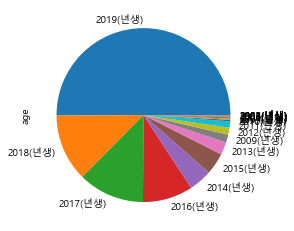

In [32]:
# 파이 그래프

data.plot.pie()

plt.show()

In [33]:
# 갯수 세기

data = simple_df['sexCd'].value_counts()

pd.DataFrame(data)

,sexCd
M,4410
F,4170
Q,837


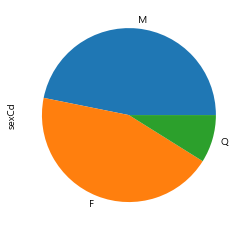

In [34]:
# 파이 그래프

data.plot.pie()

plt.show()

In [35]:
# 갯수 세기

data = simple_df['neuterYn'].value_counts()

pd.DataFrame(data)

,neuterYn
N,5957
U,3052
Y,408


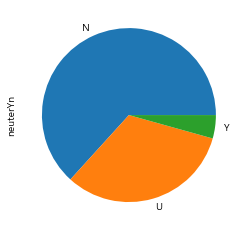

In [36]:
# 파이 그래프

data.plot.pie()

plt.show()

In [37]:
# 갯수 세기

data = simple_df['kindCd'].value_counts()

pd.DataFrame(data)

,kindCd
[개] 믹스견,4536
[고양이] 한국 고양이,2132
[개] 말티즈,436
[개] 푸들,380
[개] 진도견,236
[개] 포메라니안,164
[개] 시츄,121
[개] 요크셔 테리어,85
[개] 스피츠,78
[개] 치와와,72


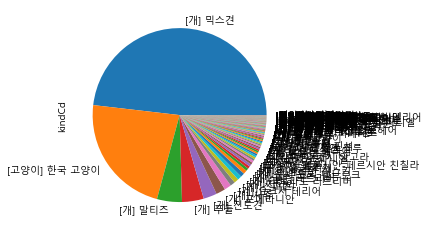

In [38]:
# 파이 그래프

data.plot.pie()

plt.show()

In [39]:
# 갯수 세기

data = simple_df['colorCd'].value_counts()

pd.DataFrame(data)

,colorCd
흰색,1729
갈색,913
검정,338
흰,284
삼색,169
검정색,142
백,136
황색,132
연갈색,125
갈,111


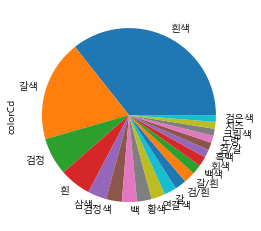

In [40]:
# 파이 그래프

# 데이터가 너무 많아서 20개로 제한
data = simple_df['colorCd'].value_counts().nlargest(20)

data.plot.pie()

plt.show()

In [45]:
# 갯수 세기

data = simple_df['happenDt'].value_counts()

pd.DataFrame(data)

,happenDt
20190916,789
20190902,661
20190909,619
20190918,609
20190917,572
20190920,529
20190910,522
20190911,521
20190919,508
20190905,504


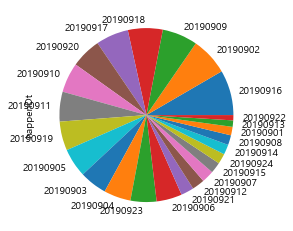

In [46]:
# 파이 그래프

data.plot.pie()

plt.show()

In [43]:
# 위의 날짜 기준 개수 구하기는 직관적이지 않음. 뭘봐야할 지 모르겟음 --> 요일을 구해볼까?
# 요일 구하기 (이 부분은 어렵습니다!)
# 판다스 함수를 사용하지 않은 파이썬 코드

DAYS = '일월화수목금토'

weekdays = []

for index in df.index:
    date = simple_df['happenDt'][index]
    # 2019년 9월 1일은 “일요일(0)”입니다.
    weekday = (int(date) - 20190901) % 7
    weekdays.append(DAYS[weekday])

simple_df = simple_df.assign(happenDay=weekdays)

simple_df.head()

,age,careAddr,careNm,chargeNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,orgNm,processState,sexCd,specialMark,weight,happenDay
0,2016(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,이주영,흰색,20190924,경남 고성군 영오면 양산4길 12,[개] 푸들,N,경상남도 고성군,보호중,M,피모 불량,5(Kg),화
1,2017(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,이주영,흰갈색,20190924,경남 고성군 하이면 월흥7길 11-3,[개] 믹스견,N,경상남도 고성군,보호중,M,특이사항 없음,6(Kg),화
2,2019(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,이주영,고동색,20190924,경남 고성군 고성읍 수남2길 39,[개] 믹스견,N,경상남도 고성군,보호중,M,특이사항 없음,4(Kg),화
3,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,의령군,흰색,20190924,경남 의령군 용덕면 가락마을부근,[개] 믹스견,U,경상남도 의령군,보호중,F,"사람 잘따름,많이 작은 사이즈",4(Kg),화
4,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,의령군,"검정,흰색갈색모색",20190924,경남 의령군 용덕면 가락마을부근,[개] 믹스견,U,경상남도 의령군,보호중,F,암컷강아지 두마리,4(Kg),화


In [44]:
# 갯수 세기

data = simple_df['happenDay'].value_counts()

pd.DataFrame(data)

,happenDay
월,2524
화,1754
수,1602
목,1231
금,1087
토,615
일,604


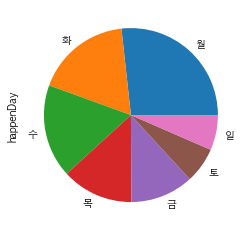

In [38]:
# 파이 그래프

data.plot.pie()

plt.show()

## 위도, 경도 얻기

반복적으로 써야 하니 함수를 만듭니다.

In [57]:
def geocode(address):
    url = 'https://us1.locationiq.com/v1/search.php'
    payload = {
        'key': LOCATIONIQ_TOKEN,
        'q': address,
        'format': 'json'
    }
    response = requests.get(url, params=payload)
    results = response.json()
    if 'error' in results:
        return None, None
    coordinates = results[0]
    return coordinates['lat'], coordinates['lon']

In [58]:
geocode('서울창업허브')

('37.54662875', '126.949684293519')

In [59]:
geocode('이 세계 어디에도 없는 주소')

(None, None)

In [64]:
# API 호출 및 지도에 표시하는 작업을 원활히 하기 위해 자료를 500개로 제한해서 sample 데이터를 만듭니다.

sample_df = simple_df.sample(n=500, random_state=1)

sample_df.shape

(500, 15)

In [65]:
# 위도, 경도 얻기

lats = []
lngs = []

for i, index in enumerate(sample_df.index):
    print(i + 1, '-', index)
    lat, lng = geocode(sample_df['orgNm'][index])
    lats.append(lat or 0)
    lngs.append(lng or 0)

sample_df = sample_df.assign(lat=lats, lng=lngs)

sample_df.head()

1 - 5075
2 - 1262
3 - 6372
4 - 8003
5 - 822
6 - 1458
7 - 6512
8 - 4484
9 - 2344
10 - 2807
11 - 2293
12 - 2934
13 - 9334
14 - 7130
15 - 288
16 - 6082
17 - 4411
18 - 975
19 - 9016
20 - 6128
21 - 8581
22 - 2459
23 - 7616
24 - 1851
25 - 2489
26 - 6228
27 - 5083
28 - 1271
29 - 1494
30 - 3347
31 - 3249
32 - 6335
33 - 2027
34 - 6323
35 - 8257
36 - 5170
37 - 6907
38 - 2400
39 - 1735
40 - 7304
41 - 2663
42 - 4521
43 - 3798
44 - 6167
45 - 4995
46 - 4892
47 - 7967
48 - 7975
49 - 3376
50 - 5231
51 - 3505
52 - 1060
53 - 8586
54 - 7873
55 - 8576
56 - 7652
57 - 4758
58 - 5727
59 - 7933
60 - 9312
61 - 1289
62 - 6029
63 - 7803
64 - 2242
65 - 308
66 - 6955
67 - 6141
68 - 954
69 - 922
70 - 8696
71 - 1515
72 - 2932
73 - 4874
74 - 4304
75 - 307
76 - 7330
77 - 1892
78 - 8567
79 - 8052
80 - 8661
81 - 923
82 - 4503
83 - 2586
84 - 691
85 - 6918
86 - 7162
87 - 9198
88 - 274
89 - 3796
90 - 4156
91 - 2300
92 - 2979
93 - 2657
94 - 8663
95 - 9020
96 - 229
97 - 7116
98 - 2461
99 - 9203
100 - 4857
101 - 7138
102 - 21

,age,careAddr,careNm,chargeNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,orgNm,processState,sexCd,specialMark,weight,happenDay,lat,lng
5075,2016(년생),"경기도 용인시 처인구 중부대로 1074-1 (삼가동, 용인시 동물보호센터)",용인시 동물보호센터,동물보호과,"갈색,흰색",20190911,처인구 모현읍 오산로 78,[개] 믹스견,N,경기도 용인시,보호중,M,"주황색목줄, 쇠리드줄 착용. 소심하고 겁이 많은 아이",9.5(Kg),수,37.2405741,127.1785572
1262,2019(년생),"전라북도 고창군 고창읍 성산8길 39-10 (고창읍, 더나은동물병원)",더나은동물병원,김민영,검정,20190920,전북 고창군 무장119소방서,[개] 믹스견,U,전라북도 고창군,보호중,F,검정색 털을 갖고 있음,5(Kg),금,35.4355,126.7021
6372,2018(년생),충청남도 아산시 둔포면 둔포로 33 (둔포면) 충청남도 아산시 염치읍 석정리 99-21,중부벳동물병원,민전식,흰색,20190908,배방 휴대리 409,[개] 믹스견,N,충청남도 아산시,보호중,M,1098호(관리) 858호(공고)말티푸 4두 유기신고. 4-2,5(Kg),일,0,0
8003,2019(년생),"강원도 홍천군 화촌면 둔덕이길 68 (화촌면, 홍천군유기동물보호센터)",홍천군유기동물보호소,최정원,황토색,20190904,홍천로1046-9 부근,[개] 믹스견,N,강원도 홍천군,보호중,Q,없음,3(Kg),수,37.6967,127.8888
822,2019(년생),부산광역시 강서구 맥도강변길 752-15 (대저2동),부산동물보호센터,김효진,"흰,검",20190921,부평동1가 15번지,[고양이] 한국 고양이,N,부산광역시 중구,보호중,Q,"중구2-110호, 젖먹이1두,인공포유중",0.2(Kg),토,35.1061,129.0323


## 지도 그리기

위도/경도 데이터를 얻었기 때문에 지도에 그려볼 수 있습니다.

In [66]:
# 위도, 경도만 모읍니다.

coordinates = sample_df[['lat', 'lng']]

coordinates

,lat,lng
5075,37.2405741,127.1785572
1262,35.4355,126.7021
6372,0,0
8003,37.6967,127.8888
822,35.1061,129.0323
1458,0,0
6512,36.29812,127.4148
4484,36.0189315,129.3429384
2344,0,0
2807,0,0


In [67]:
# 지도 준비

map = Map(location=[36.5, 127.5], zoom_start=7)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=5_000,
        weight=1,
        fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map

In [68]:
# 지도 준비

map = Map(location=[36.5, 127.5], zoom_start=7)

# 히트맵 표시

HeatMap(data=coordinates, radius=20).add_to(map)

map

---

#### 그려진 지도 줌인줌아웃 되도록 하는걸 주피터말고 구글로 보고싶다거나 한다면,
#### csv로 저장해서 구글맵에 csv 마커 띄우기 등으로 검색하여 구현이 가능하다.
#### 하지만 간편하게 nbviewer 사이트나 github를 이용하는 것을 추천!